In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Read data

In [4]:
import numpy as np
import pandas as pd
heart=pd.read_csv("heart.csv")

In [5]:
heart.head(3)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1

In [9]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Data Exploration

In [15]:
heart.target.value_counts()

1    165
0    138
Name: target, dtype: int64

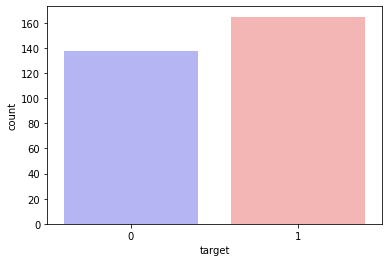

In [16]:
sns.countplot(x='target',data=heart,palette='bwr')
plt.show()

In [18]:
countNoDisease=len(heart[heart.target==0])
countHaveDisease=len(heart[heart.target==1])
print("Percentage of Patients Haven't Heart Disease:{:.2f}%".format((countNoDisease/(len(heart.target))*100)))
print("Percentage of Patients Have Heart Disease:{:.2f}%".format((countHaveDisease/(len(heart.target))*100)))


Percentage of Patients Haven't Heart Disease:45.54%
Percentage of Patients Have Heart Disease:54.46%


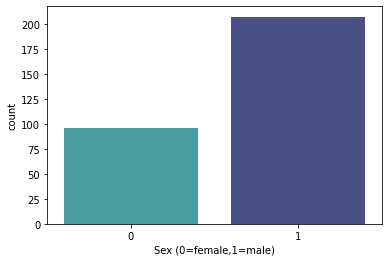

In [19]:
sns.countplot(x='sex',data=heart,palette='mako_r')
plt.xlabel("Sex (0=female,1=male)")
plt.show()

In [21]:
countFemale=len(heart[heart.sex==0])
countMale=len(heart[heart.sex==1])
print('Percentage of Female Patients: {:.2f}%'.format((countFemale/(len(heart.sex))*100)))
print('Percentage of Male Patients: {:.2f}%'.format((countMale/(len(heart.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


In [22]:
heart.groupby('target').mean()

age       sex        cp    trestbps        chol       fbs  \
target                                                                    
0       56.601449  0.826087  0.478261  134.398551  251.086957  0.159420   
1       52.496970  0.563636  1.375758  129.303030  242.230303  0.139394   

         restecg     thalach     exang   oldpeak     slope        ca      thal  
target                                                                          
0       0.449275  139.101449  0.550725  1.585507  1.166667  1.166667  2.543478  
1       0.593939  158.466667  0.139394  0.583030  1.593939  0.363636  2.121212

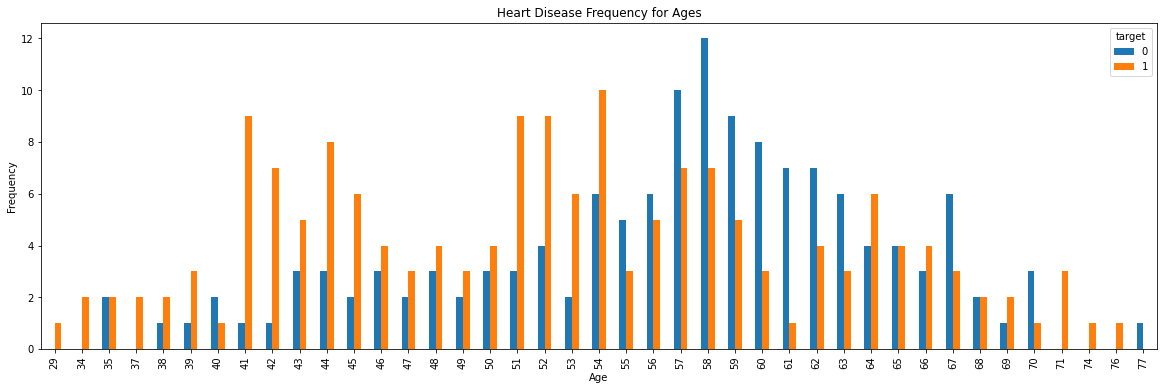

In [24]:
pd.crosstab(heart.age,heart.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

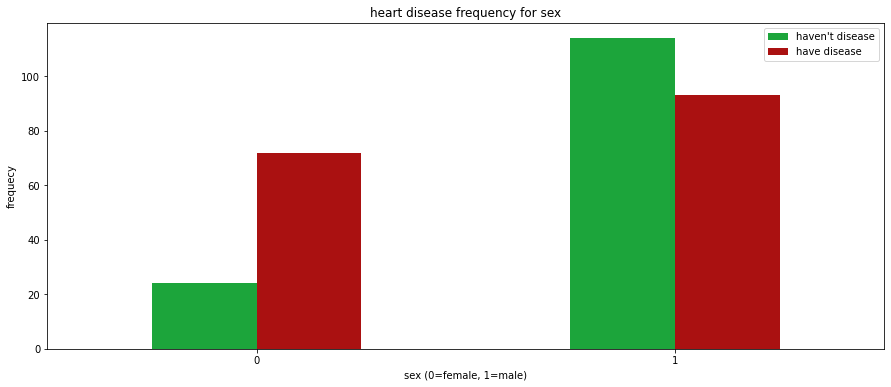

In [26]:
pd.crosstab(heart.sex,heart.target).plot(kind='bar',figsize=(15,6),color=['#1CA53B','#AA1111'])
plt.title('heart disease frequency for sex')
plt.xlabel('sex (0=female, 1=male)')
plt.xticks(rotation=0)
plt.legend(["haven't disease",'have disease'])
plt.ylabel("frequecy")
plt.show()

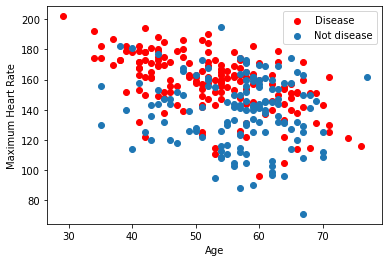

In [27]:
plt.scatter(x=heart.age[heart.target==1],y=heart.thalach[(heart.target==1)],c="red")
plt.scatter(x=heart.age[heart.target==0],y=heart.thalach[(heart.target==0)])
plt.legend(['Disease','Not disease'])
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')
plt.show()

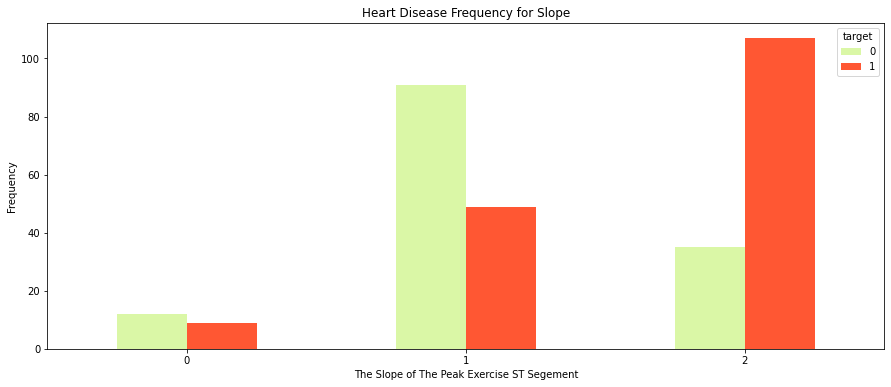

In [28]:
pd.crosstab(heart.slope,heart.target).plot(kind='bar',figsize=(15,6),color=['#DAF7A6','#FF5733'])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segement')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

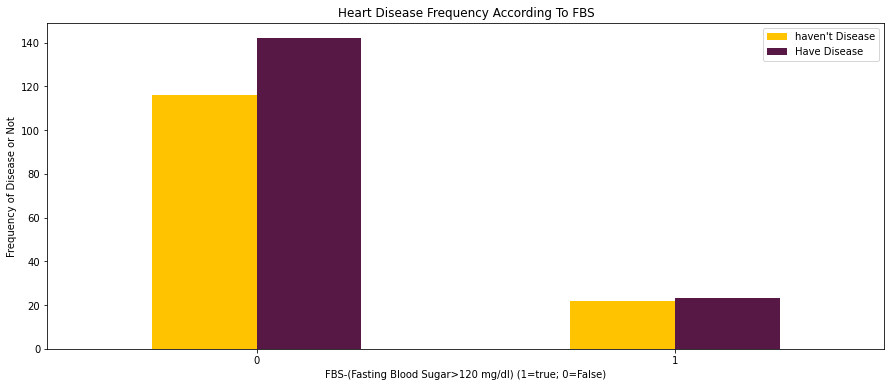

In [29]:
pd.crosstab(heart.fbs,heart.target).plot(kind='bar',figsize=(15,6),color=['#FFC300','#581845'])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS-(Fasting Blood Sugar>120 mg/dl) (1=true; 0=False)')
plt.xticks(rotation=0)
plt.legend(["haven't Disease","Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

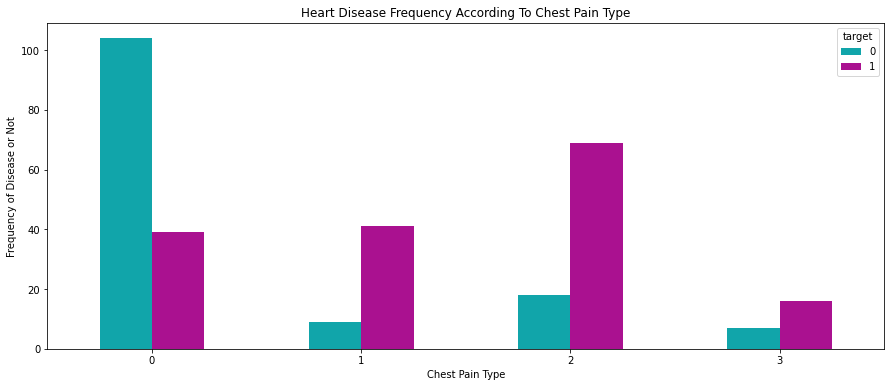

In [30]:
pd.crosstab(heart.cp,heart.target).plot(kind='bar',figsize=(15,6),color=['#11A5AA','#AA1190'])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation=0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

# Creating Dummy Variables

since 'cp','thal',and 'slope' are categorical variables we'll turn them into dummy variables

In [31]:
a=pd.get_dummies(heart['cp'],prefix='cp')
b=pd.get_dummies(heart['thal'],prefix='thal')
c=pd.get_dummies(heart['slope'],prefix='slope')

In [32]:
frames=[heart,a,b,c]
heart=pd.concat(frames,axis=1)
heart.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0      2.3  ...   
1   37    1   2       130   250    0        1      187      0      3.5  ...   
2   41    0   1       130   204    0        0      172      0      1.4  ...   
3   56    1   1       120   236    0        1      178      0      0.8  ...   
4   57    0   0       120   354    0        1      163      1      0.6  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 25 columns]

In [36]:
heart=heart.drop(columns=['cp','thal','slope'])
heart.head()

age  sex  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ca  ...  \
0   63    1       145   233    1        0      150      0      2.3   0  ...   
1   37    1       130   250    0        1      187      0      3.5   0  ...   
2   41    0       130   204    0        0      172      0      1.4   0  ...   
3   56    1       120   236    0        1      178      0      0.8   0  ...   
4   57    0       120   354    0        1      163      1      0.6   0  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 22 columns]

# creating model for Logistic Regression

we can use sklearn library or we can write functions ourselves.
Let's them both. Firstly we will write our functions after that we'll use sklearn library to calculate score.


In [39]:
y=heart.target.values
x_data=heart.drop(['target'],axis=1)

In [40]:
#normalize
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
x_train=x_train.T
y_train=y_train.T
x_test=x_test.T
y_test=y_test.T

In [45]:
#initialize
def initialize(dimension):
    weight=np.full((dimension,1),0.01)
    bias=0.0
    return weight,bias

In [47]:
def sigmoid(z):
    y_head=1/(1+np.exp(-z))
    return y_head

In [54]:
def forwardBackward(weight,bias,x_train,y_train):
    #Forward
    y_head=sigmoid(np.dot(weight.T,x_train)+bias)
    loss=-(y_train*np.log(y_head)+(1-y_train)*np.log(1-y_head))
    cost=np.sum(loss)/x_train.shape[1]
    
    #Backward
    derivative_weight=np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias=np.sum(y_head-y_train)/x_train.shape[1]
    gradients={'Derivative Weight': derivative_weight,'Derivative Bias': derivative_bias}
    
    return cost,gradients

In [63]:
def update(weight,bias,x_train,y_train,learningRate,iteration):
    costList=[]
    index=[]
    
    for i in range(iteration):
        cost,gradients=forwardBackward(weight,bias,x_train,y_train)
        weight=weight-learningRate*gradients['Derivative Weight']
        bias=bias-learningRate*gradients['Derivative Bias']
        
        costList.append(cost)
        index.append(i)
        
    parameters={'weight':weight,"bias":bias}
    
    print('iteration:',iteration)
    print('cost:',cost)
    
    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()
    
    return parameters,gradients

In [64]:
def predict(weight,bias,x_test):
    z=np.dot(weight.T,x_test)+bias
    y_head=sigmoid(z)
    
    y_prediction=np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i]<=0.5 :
            y_prediction[0,i]=0
        else:
            y_prediction[0,i]=1
    return y_prediction

In [65]:
def logistic_regression(x_train,y_train,x_test,y_test,learningRate,iteration):
    dimension=x_train.shape[0]
    weight,bias=initialize(dimension)
    
    parameters,gradients=update(weight,bias,x_train,y_train,learningRate,iteration)
    
    y_prediction=predict(parameters['weight'],parameters['bias'],x_test)
    
    print("manuel Test Accuracy: {:.2f}%".format((100-np.mean(np.abs(y_prediction-y_test))*100)))

iteration: 100
cost: 0.35977361236645333


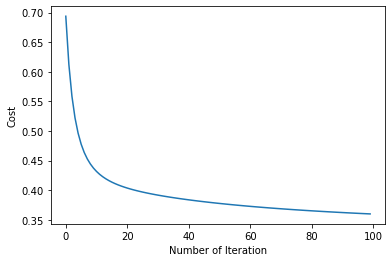

manuel Test Accuracy: 86.89%


In [66]:
logistic_regression(x_train,y_train,x_test,y_test,1,100)

# Sklearn Logistic Regression

In [67]:
accuracies={}
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc=lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression']=acc
print('Test Accuracy {:.2f}%'.format(acc))

Test Accuracy 86.89%


# k-Nearest Neighbour(KNN) Classification

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T,y_train.T)
prediction=knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2,knn.score(x_test.T,y_test.T)*100))

2 NN Score: 77.05%


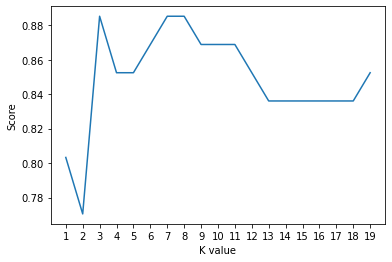

In [70]:
scoreList=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T,y_train.T)
    scoreList.append(knn2.score(x_test.T,y_test.T))
    
plt.plot(range(1,20),scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.show()

# Support Vector Machine Algorithm

In [71]:
from sklearn.svm import SVC

In [72]:
svm=SVC(random_state=1)
svm.fit(x_train.T,y_train.T)

acc=svm.score(x_test.T,y_test.T)*100
accuracies['SVM']=acc
print('Test Accuracy of SVM Algorithm: {:.2f}%'.format(acc))

Test Accuracy of SVM Algorithm: 88.52%


# Naive Bayes Algorithm

In [74]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.T,y_train.T)

acc=nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes']=acc
print('Accuracy of Naive Bayes: {:.2f}%'.format(acc))

Accuracy of Naive Bayes: 86.89%


# Decision Tree Algorithm

In [77]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train.T,y_train.T)
acc=dtc.score(x_test.T,y_test.T)*100
accuracies['Decision Tree']=acc
print('Decision Tree Test Accuracy {:.2f}%'.format(acc))

Decision Tree Test Accuracy 78.69%


# Random Forest Classification

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train.T,y_train.T)

acc=rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest']=acc
print('Random Forest Algorithm Accuracy Score: {:.2f}%'.format(acc))

Random Forest Algorithm Accuracy Score: 88.52%


# comparing models

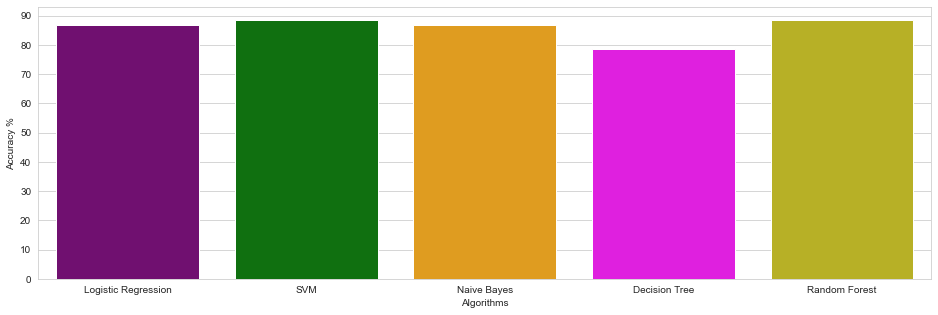

In [80]:
colors=['purple','green','orange','magenta','#CFC60E','#0FBBAE']

sns.set_style('whitegrid')
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Accuracy %')
plt.xlabel('Algorithms')
sns.barplot(x=list(accuracies.keys()),y=list(accuracies.values()),palette=colors)
plt.show()